
# Importing Libraries


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(69)

### Importing dataset

In [149]:
data = pd.read_excel("Patient_Data_New.xlsx")

In [150]:
data.head()

,Name,PRN,age,gender,date of onset,time of onset,date of admission,date of discharge,cell1,cell2,...,MCTA,ecosprine,clopidogril,thrombolysis,thrombolytic agent,anticoagulation,mechanical thrombectomy,decompressive hemicranectomy,MRS,barthel index
0,Prakash Marne,2.300001e+10,51.0,1.0,2023-10-27 00:00:00,06:30:00,2023-10-27,2023-10-31,9.551710e+09,NaN,...,5.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,0,75
1,Santosh nande,2.009006e+08,55.0,1.0,2023-09-11 00:00:00,06:30:00,2023-09-11,2023-10-05,9.890855e+09,NaN,...,4.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,0,85
2,Devka yashoda,2.302051e+08,70.0,2.0,2023-02-26 00:00:00,19:00:00,2023-02-26,2023-02-28,8.888435e+09,NaN,...,NaN,1.0,1.0,2.0,NaN,8.0,NaN,NaN,0,100
3,Shrirang Jadhav 231200200,2.300000e+11,62.0,1.0,2023-12-02 00:00:00,NaN,2023-12-06,2023-12-05,7.588685e+09,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,90
4,Vinod Shinde,2.400000e+11,49.0,1.0,2024-01-12 00:00:00,14:00:00,2024-01-12,2024-01-22,7.741943e+09,9.850170e+09,...,5.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,0,95


In [151]:
data.shape

(181, 51)

In [152]:
data.isna().sum()

Name                              0
PRN                               9
age                               2
gender                            1
date of onset                    62
time of onset                    77
date of admission                 3
date of discharge                32
cell1                            16
cell2                           153
NIHSS                             9
SHT                               5
DM                                5
Alcohol                           5
smoking                           5
tobacco                           5
dyslipidaemia                     5
atrial fibrillation               5
IHD                               5
rheumatic heart disease           5
other risk factors               94
haemoglobin                       9
PCV                              34
MCV                             111
Homocystiene                     25
HbA1C                            43
Cholesterol                      57
LDL cholesterol             

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          181 non-null    object        
 1   PRN                           172 non-null    float64       
 2   age                           179 non-null    float64       
 3   gender                        180 non-null    float64       
 4   date of onset                 119 non-null    object        
 5   time of onset                 104 non-null    object        
 6   date of admission             178 non-null    datetime64[ns]
 7   date of discharge             149 non-null    datetime64[ns]
 8   cell1                         165 non-null    float64       
 9   cell2                         28 non-null     float64       
 10  NIHSS                         172 non-null    float64       
 11  SHT                           17

In [154]:
data.nunique()

Name                            179
PRN                             125
age                              57
gender                            2
date of onset                    97
time of onset                    46
date of admission               144
date of discharge               122
cell1                           156
cell2                            27
NIHSS                            24
SHT                               2
DM                                2
Alcohol                           2
smoking                           2
tobacco                           2
dyslipidaemia                     2
atrial fibrillation               2
IHD                               2
rheumatic heart disease           2
other risk factors               85
haemoglobin                      78
PCV                             112
MCV                              61
Homocystiene                    138
HbA1C                            59
Cholesterol                      82
LDL cholesterol             

### Dropping unnecesaary Features

In [155]:
data.columns

Index(['Name', 'PRN', 'age', 'gender', 'date of onset', 'time of onset',
       'date of admission', 'date of discharge', 'cell1', 'cell2', 'NIHSS',
       'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco', 'dyslipidaemia',
       'atrial fibrillation', 'IHD', 'rheumatic heart disease',
       'other risk factors', 'haemoglobin', 'PCV', 'MCV', 'Homocystiene',
       'HbA1C', 'Cholesterol', 'LDL cholesterol', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'other investigations',
       'Stroke volume', 'MRI Brain', 'CT Angiography', 'V53', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'ecosprine', 'clopidogril',
       'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'barthel index'],
      dtype='object')

In [156]:
#important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
 #      'dyslipidaemia', 'atrial fibrillation', 'IHD',
   #    'rheumatic heart disease', 'haemoglobin', 'PCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL cholesterol',
    #   'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'ecosprine',
    #   'clopidogril', 'thrombolysis', 'thrombolytic agent', 'anticoagulation',
     #  'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
    #   'barthel index']

In [157]:
# important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
#       'dyslipidaemia', 'atrial fibrillation', 'IHD',
#       'rheumatic heart disease', 'haemoglobin', 'Homocystiene', 'CT ASPECTS', 'MRS',
#        'barthel index']

In [158]:
important_features = ['Name', 'Stroke volume', 'age', 'Alcohol',  'NIHSS', 'SHT', 'DM', 
      'dyslipidaemia', 'LDL cholesterol'
       ,   'MRS',
       'barthel index']

In [159]:
data = data[important_features]

In [160]:
data.head()

,Name,Stroke volume,age,Alcohol,NIHSS,SHT,DM,dyslipidaemia,LDL cholesterol,MRS,barthel index
0,Prakash Marne,2.63467,51.0,1.0,5.0,1.0,2.0,2.0,106.2,0,75
1,Santosh nande,3.51612,55.0,2.0,8.0,1.0,1.0,2.0,42.6,0,85
2,Devka yashoda,3.75343,70.0,NaN,NaN,NaN,NaN,NaN,NaN,0,100
3,Shrirang Jadhav 231200200,6.56245,62.0,2.0,5.0,2.0,1.0,2.0,NaN,0,90
4,Vinod Shinde,7.38095,49.0,1.0,1.0,1.0,1.0,2.0,139.0,0,95


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             181 non-null    object 
 1   Stroke volume    181 non-null    float64
 2   age              179 non-null    float64
 3   Alcohol          176 non-null    float64
 4   NIHSS            172 non-null    float64
 5   SHT              176 non-null    float64
 6   DM               176 non-null    float64
 7   dyslipidaemia    176 non-null    float64
 8   LDL cholesterol  123 non-null    float64
 9   MRS              181 non-null    int64  
 10  barthel index    181 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 15.7+ KB


- Storke Volume is Object , we need all the stroke volume as float

In [162]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [163]:
data.loc[:,'Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

## Dealing with NULL values

- Checking Null Stroke Volume

In [164]:
data["Stroke volume"].isna().sum()

0

- Checking NULL MRS value

In [165]:
data['MRS'].isna().sum()

0

In [166]:
data.shape

(181, 11)

### Dropping NULL MRS and NULL Stroke Volume


In [167]:
data.dropna(subset=['MRS'], inplace=True)

In [168]:
data.shape

(181, 11)

In [169]:
data['Stroke volume'].isna().sum()

0

In [170]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [171]:
data.drop(columns=["Name"], inplace=True)

In [172]:
data.head()

,Stroke volume,age,Alcohol,NIHSS,SHT,DM,dyslipidaemia,LDL cholesterol,MRS,barthel index
0,2.63467,51.0,1.0,5.0,1.0,2.0,2.0,106.2,0,75
1,3.51612,55.0,2.0,8.0,1.0,1.0,2.0,42.6,0,85
2,3.75343,70.0,NaN,NaN,NaN,NaN,NaN,NaN,0,100
3,6.56245,62.0,2.0,5.0,2.0,1.0,2.0,NaN,0,90
4,7.38095,49.0,1.0,1.0,1.0,1.0,2.0,139.0,0,95


<Axes: xlabel='MRS', ylabel='count'>

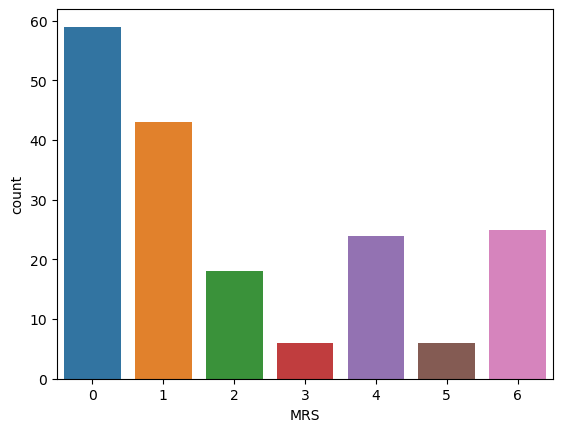

In [173]:
sns.countplot(data=data, x='MRS')

## Ajusting Binary Values

In [174]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [175]:
data.reset_index(inplace=True, drop=True)

In [176]:
data.head()

,Stroke volume,age,Alcohol,NIHSS,SHT,DM,dyslipidaemia,LDL cholesterol,MRS,barthel index
0,2.63467,51.0,1.0,5.0,1.0,0.0,0.0,106.2,0,75
1,3.51612,55.0,0.0,8.0,1.0,1.0,0.0,42.6,0,85
2,3.75343,70.0,NaN,NaN,NaN,NaN,NaN,NaN,0,100
3,6.56245,62.0,0.0,5.0,0.0,1.0,0.0,NaN,0,90
4,7.38095,49.0,1.0,1.0,1.0,1.0,0.0,139.0,0,95


In [177]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

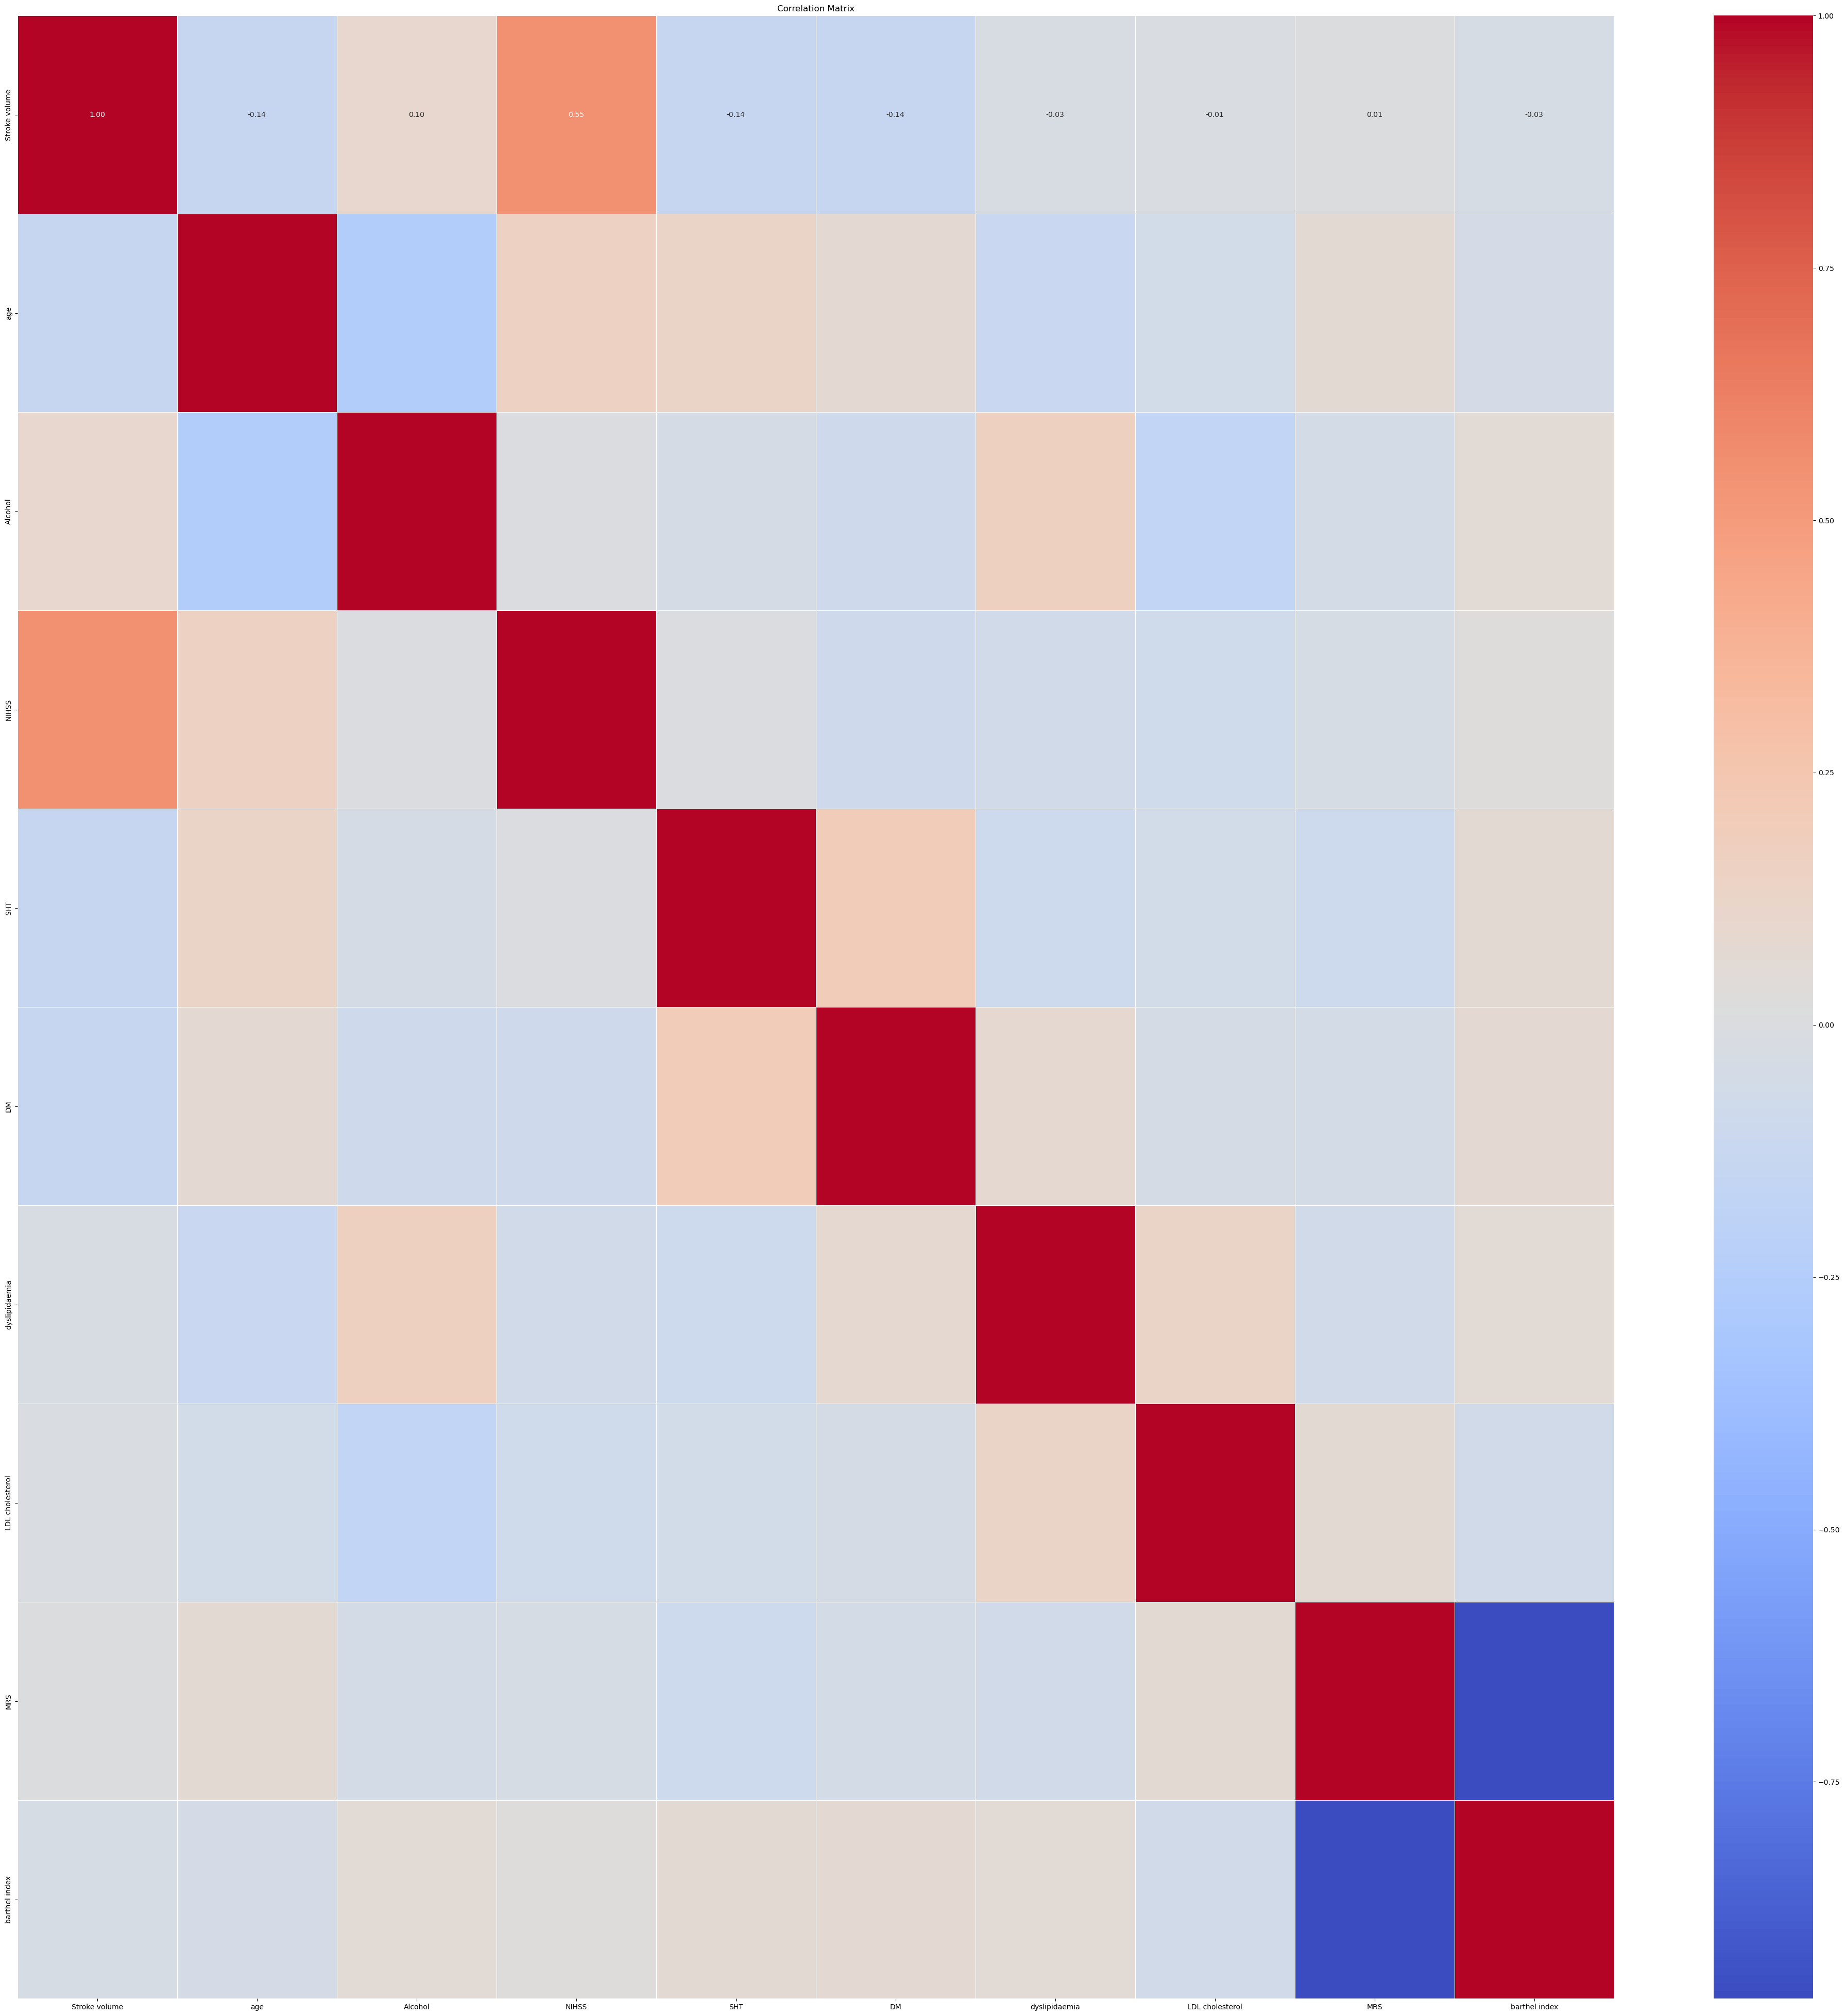

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [179]:
y = data.iloc[:,-2].values
z = data.iloc[:,-1].values
X = data.drop(columns=["MRS","barthel index"])
X = X.to_numpy()

In [180]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6], dtype=int64)

In [181]:
z

array([ 75,  85, 100,  90,  95, 100, 100,  90, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100,  80,  85,  85,  85,  85,
        85,  90,  90,  90,  90,  90,  90,  95,  95,  95,  95,  95,  95,
        95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        90, 100, 100, 100, 100, 100, 100, 100, 100, 100,  90,  60,  65,
        65,  65,  70,  80,  80,  85,  85,  85,  90,  90,  90,  95,  95,
        85,  85,  80,  60,  60,  60,  65,  70,  75,  15,  15,  20,  25,
        30,  35,  40,  40,  40,  40,  40,  40,  45,  50,  50,  50,  60,
        65,  65,  60,  50,  40,  30,  15,   5,  10,  15,  20,  25,  25,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [182]:
X

array([[  2.63467,  51.     ,   1.     , ...,   0.     ,   0.     ,
        106.2    ],
       [  3.51612,  55.     ,   0.     , ...,   1.     ,   0.     ,
         42.6    ],
       [  3.75343,  70.     ,       nan, ...,       nan,       nan,
              nan],
       ...,
       [108.176  ,  65.     ,   0.     , ...,   1.     ,   0.     ,
              nan],
       [117.921  ,  70.     ,   0.     , ...,   0.     ,   0.     ,
         90.     ],
       [249.581  ,  50.     ,   0.     , ...,   0.     ,   0.     ,
        182.     ]])

## Preprocessing Pipeline

In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [184]:
data.isna().sum()

Stroke volume       0
age                 2
Alcohol             5
NIHSS               9
SHT                 5
DM                  5
dyslipidaemia       5
LDL cholesterol    58
MRS                 0
barthel index       0
dtype: int64

In [185]:
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features = [data.columns.get_loc(feature) for feature in binary_features]
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [186]:
numeric_features = ['Stroke volume', 'age', 'NIHSS','LDL cholesterol' ]
numeric_features = [data.columns.get_loc(feature) for feature in numeric_features]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)


In [187]:
# numeric_features = ['Stroke volume', 'age', 'NIHSS', 'haemoglobin ,'Homocystiene', 'CT ASPECTS']
# numeric_features = [data.columns.get_loc(feature) for feature in numeric_features]
# numeric_transformer = Pipeline(
#     steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
# )

In [188]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features),
    ]
)

In [189]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

## Importing Different Models

In [190]:
#! pip install catboost

In [191]:
# Models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Model Pipeline

In [192]:
pipeline = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())]
)

## Cross Validation Pipeline

In [193]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [194]:
# Define parameters for K-Neighbors
param1 = {}
param1['regressor__n_neighbors'] = [3, 5, 7]
param1['regressor__weights'] = ['uniform', 'distance']
param1['regressor__algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
param1['regressor'] = [KNeighborsRegressor()]

# Define parameters for Decision Tree
param2 = {}
param2['regressor__max_depth'] = [3, 5, 10]
param2['regressor'] = [DecisionTreeRegressor()]

# Define parameters for Random Forest
param3 = {}
param3['regressor__n_estimators'] = [50, 100, 200]
param3['regressor__max_depth'] = [3, 5, 10]
param3['regressor__criterion'] = ['absolute_error', 'friedman_mse', 'squared_error']
param3['regressor__bootstrap'] = [True]
param3['regressor'] = [RandomForestRegressor()]

# Define parameters for AdaBoost
param4 = {}
param4['regressor__n_estimators'] = [50, 100, 200]
param4['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param4['regressor__estimator'] = [DecisionTreeRegressor(), RandomForestRegressor()]
param4['regressor'] = [AdaBoostRegressor()]

# Define parameters for SVR
param5 = {}
param5['regressor__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
param5['regressor__C'] = [0.1, 1, 10]
param5['regressor__gamma'] = ['scale', 'auto']
param5['regressor'] = [SVR()]

# Define parameters for CatBoosting
param6 = {}
param6['regressor__n_estimators'] = [50, 100, 200]
param6['regressor__depth'] = [3, 5, 10]
param6['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param6['regressor'] = [CatBoostRegressor(verbose=False)]

# Define parameters for XGBRegressor
param7 = {}
param7['regressor__n_estimators'] = [50, 100, 200]
param7['regressor__max_depth'] = [3, 5, 10]
param7['regressor__learning_rate'] = [0.1, 0.01, 0.001]
param7['regressor'] = [XGBRegressor()]

In [195]:
params = [param1, param2, param3, param4, param5, param6, param7]

In [196]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [197]:
grid = GridSearchCV(pipeline, params, cv=cv, n_jobs = -1, scoring='r2', verbose=10).fit(X, y)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [198]:
print(grid.best_params_)

{'regressor': RandomForestRegressor(), 'regressor__bootstrap': True, 'regressor__criterion': 'absolute_error', 'regressor__max_depth': 10, 'regressor__n_estimators': 100}


In [199]:
print(grid.best_score_)

0.6587762759992067


In [200]:
means = grid.cv_results_['mean_test_score']
params_summary = grid.cv_results_['params']

In [201]:
df = pd.DataFrame(list(zip(means, params_summary)), columns=['Mean Score', 'Parmeters'])
df = df.sort_values(by = 'Mean Score', ascending=False)

In [202]:
from datetime import datetime
import os
current_time = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
results_path = 'Results-'+ current_time + '.csv'
df.to_csv(results_path, index=False)

In [203]:
# CART, PERT, Random Forest Bagging & Boosting(Entropy or Gini indix), SVM(All Kernels), K_Folds

In [204]:
#logistic regression, Naive Bayes,